In [2]:
from SNRanalysis import *
from covseisnetfunc import *

This workbook runs through the usage of functions contained within the python file SNRanalysis.py. The purpose is to analyse broadband cross-correlation functions computed in MSNoise (or elsewhere, but codes expect CCF outputs in the same format as MSNoise e.g. within 'STACKS' directory (suffix option available e.g. STACKS1, STACK2, etc.). Ideally, filters will have reference number '01' within MSNoise, and be filtered between approximately 0.01 - 10 Hz (currently, the highest central frequency analysed (7.0 Hz) is a filter defined between 4.9-9.9 Hz).

First part is chosing parameters associated with computation cross-correlation functions in MSNoise. They are passed as an argument through the array CCFparams. We will also choose the startdate and enddate for plotting. Note that, for now, these functions can only examine a single-station pair at a time, or single component combination for one station (i.e. we have to define stat1 and stat2).

In [3]:
#params for which data to use
startdate = '2006-02-01'
enddate = '2006-03-01'

#CCF params
noisedir = '/home/yatesal/msnoise/ruapehu1' #set to directory containing 'STACK' folder of interest
network = 'NZ' #set network
loc = '10' #set location
stat1 = 'NGZ' #set first station code
stat2 = 'PKVZ' #set second station code. For single-stat set to same as stat1.
component = 'ZZ' #set component pair of interest
stacksize = 10 #not required to match msnoise stacksize, must be greater than 1.
fs = 25 #set to match CCFs
maxlag = 120 #set to match CCFs

#put into array for passing to functions
CCFparams = [noisedir, network, loc, stat1, stat2, component, stacksize, fs, maxlag]


The next step is choosing the minimum and maximum lag time for the window where we will be computing the SNR and phase stack average for each frequency through time (i.e. the coda window). The example below illustrates setting the minimum lag time statically (i.e. not calculated using interstation distances). We could do the same for the maximum lag time, however setting this to None means the window width will be determined by the number of cycles of the central frequency within each band analysed. At the moment, this is a hardcoded value (~15 cycles).

In [10]:
minlagwin = 15
maxlagwin = None 

<h3> Plot SNR </h3>

The function below plotSNR() will plot the SNR against lag time, with the SNR computed as described in Clarke et al. (2011). Briefly stated, it is the amplitude envelope of the stacked CCF divided by the a noise signal, representing the variation/standard deviation of individual 1-day stacks it is comprised of.

Optional arguments include norm (boolean), which can be used to normalise all 1-day CCFs prior to stacking for amplitude envelope. Setting to true may result in ballistic arrivals being assigned very high SNR. The 'stacksuffix' command can be used if you have added a prefix to your STACKS directory (created by MSNoise), e.g. stacksuffix='01' if directory is called STACKS01. 

/home/yatesal/covseisnet_ASY/SNRanalysis.py:119: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(ccfdates, centfreqs, snr_freq_array[:,:-1], rasterized=True, cmap="jet", shading='auto')


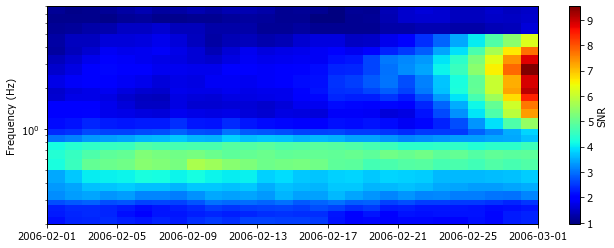

In [6]:
plotSNR(CCFparams, startdate, enddate, minlagwin, maxlagwin, norm=False, stacksuffix='')

<h3> Plot Phase Stack </h3>

We can also plot the phase stack as a way of checking the coherency of phases. This way, we get a clearer picture than just using the SNR as above, which is strongly influenced by the amplitudes of peaks at different lag times. The function plotPhaseStack achieves this, taking similar arguments to the previous function.

/home/yatesal/covseisnet_ASY/SNRanalysis.py:330: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(ccfdates, centfreqs, snr_freq_array[:,:-1], rasterized=True, cmap="jet", shading='auto')


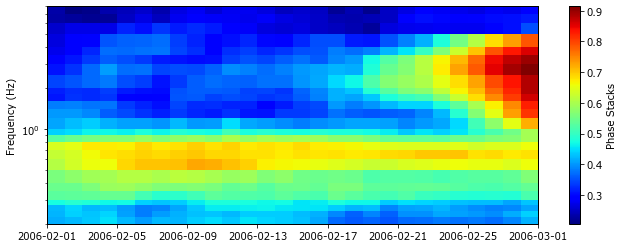

In [7]:
plotPhaseStack(CCFparams, startdate, enddate, minlagwin, maxlagwin)

<h3> Plot Amplitude Asymmetry </h3>

Another plot is one that shows the amplitude asymmetry between the two different cross-correlation functions. It works by computing the ratio of maximum amplitude recorded on positive and negative sides of CCF, avoiding part of the CCF defined using a minimum lag time (both sides). The final output is the ratio to log base 2, such that a value of 1 indicates the amplitude of positive side of CCF is double, a value of 2 is four times the amplitude etc. (and negative values indicate the reverse, and zero means the same).

/home/yatesal/covseisnet_ASY/SNRanalysis.py:231: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(ccfdates, centfreqs, asym_freq_array[:,:-1], rasterized=True, cmap="seismic", shading='auto', vmin=maxasym*-1, vmax=maxasym)


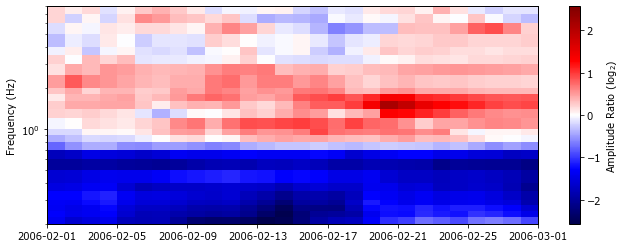

In [8]:
plotAmpAsymmetry(CCFparams, startdate, enddate, minlag=2)

<h3> Plot Spectral Width Output </h3>

We can also plot the spectral width, computed using the run_covseisnet() function within the covseisnetfunc.py python file. We just need to define what the name of the directory is (within the outputs folder) corresponding to the spectral width we computed. Note, this is currently quite picky with format/structure, so will only work in its current state if you have computed the Spectral width using the run_covseisnet() function in its current form. Boolean 'norm' indicates whether to normalize spectral width computations (i.e. each time the spectral width is measured within a window, take the maximum recorded over all frequencies and divide all by this). 

/home/yatesal/covseisnet_ASY/covseisnetfunc.py:283: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(times, frequencies, spectral_width, rasterized=True, cmap="viridis_r", shading='auto') #viridis_r


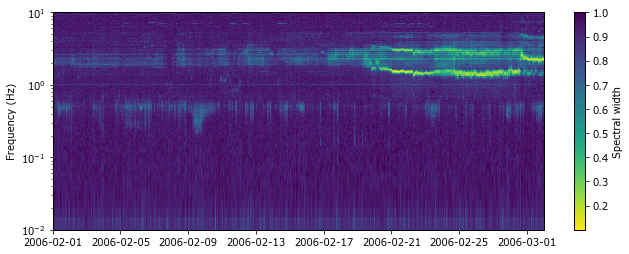

In [12]:
csndirectory = 'RUA002' #set to directory containing covseisnet output
plotSpectralWidth(csndirectory, startdate, enddate, norm=True)

<h3> Plot Spectrogram </h3>

Note... this will only work if spectrogram is output in specific .csv format (so mainly for you Corentin if your codes are still producing similar output!). Can sort a better way later.

In [ ]:
#param for spectogram
specdir='/home/yatesal/Scripts/Corentin_RSAM/output/'
specfname='DRZ_EHZ_2006_1_1_2006_12_1.csv' #csv file name
vmax = 30000 #for plotting

plot_spectogram(specdir+specfname, startdate, enddate, classic=True, demean=False,norm=False, Cor_norm=False, vmax=vmax)


/home/yatesal/covseisnet_ASY/SNRanalysis.py:695: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh=ax.pcolormesh(df.index,df.columns,df.T,vmin=-120,vmax=vmax,cmap='Spectral_r')


<h3> Plotting Multiple Plots Together </h3>

It is useful to show the plots above together, which is why each function above has the option argument 'fig', and 'ax', which are by default set to None (in this case, the figure is defined within the function and plotted). However, if you define your own subplot beforehand, you can pass your own figure and axes to show multiple together... following the example below.

/home/yatesal/covseisnet_ASY/SNRanalysis.py:119: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(ccfdates, centfreqs, snr_freq_array[:,:-1], rasterized=True, cmap="jet", shading='auto')
/home/yatesal/covseisnet_ASY/SNRanalysis.py:330: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(ccfdates, centfreqs, snr_freq_array[:,:-1], rasterized=True, cmap="jet", shading='auto')
/home/yatesal/covseisnet_ASY/SNRanalysis.py:231: Matpl

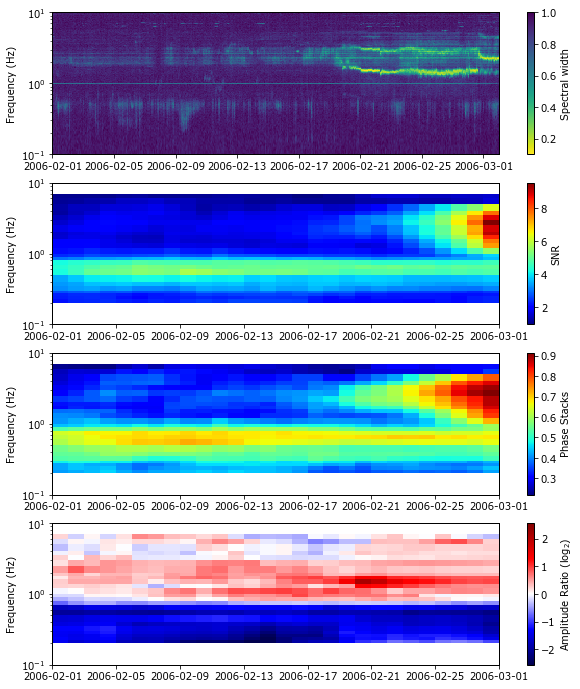

In [13]:
fig, ax = plt.subplots(4, figsize=(10,12))

plotSpectralWidth(csndirectory, startdate, enddate, norm=True, fig=fig, ax=ax[0])
plotSNR(CCFparams, startdate, enddate, minlagwin, maxlagwin, norm=False, fig=fig, ax=ax[1])
plotPhaseStack(CCFparams, startdate, enddate, minlagwin, maxlagwin, fig=fig, ax=ax[2])
plotAmpAsymmetry(CCFparams, startdate, enddate, minlag=2, fig=fig, ax=ax[3])

for i in range(len(ax)):
    ax[i].set_ylim(0.1,10)


<h3> Plotting SNR and Phase Stack Amplitude vs lag time </h3>

Finally, it may be useful to plot the SNR and phase stack amplitude against lag time for determine the coda windows. This can be achieved with the functions below, once again using optional arguments fig and ax to plot them together.

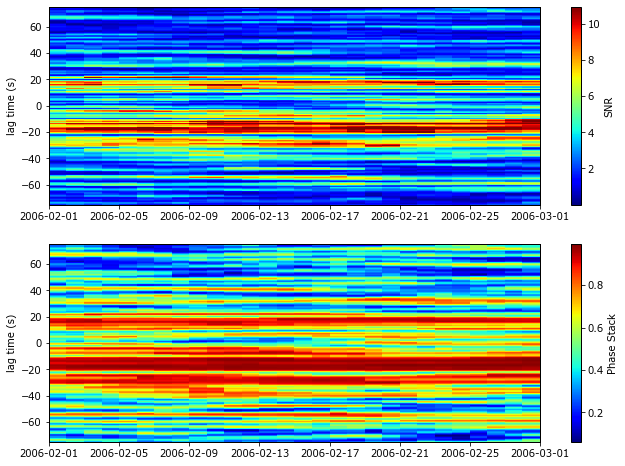

In [5]:
frange=[0.3,0.8] #set flow and fhigh

fig, ax = plt.subplots(2,1, figsize=(11,8))

plotSNR_time(CCFparams, startdate, enddate, frange, fig=fig, ax=ax[0])
plotPhaseStack_time(CCFparams, startdate, enddate, frange, fig=fig, ax=ax[1])

for i in range(len(ax)):
    ax[i].set_ylim(-75,75)